<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/%D1%81%D0%B3%D0%BB%D0%B0%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%82%D0%B5%D1%81%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
import pandas as pd
import ruptures as rpt
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/series_data.csv'
end_train = '2023-12-24 23:59:59'
path_csv_red = '/content/drive/MyDrive/Colab Notebooks/zvezda/Server_zvezda/Dataset/ts2024.csv'


# Читаем данные из CSV файла в DataFrame
df = pd.read_csv(path_csv_red)

# Преобразуем один из столбцов DataFrame в pd.Series
series_data = df['SALES VOL']  # Замените 'column_name' на имя столбца, содержащего данные
date_idx = pd.date_range(start='2022-01-01', periods=56,freq='2W-SUN')
series_data.index = date_idx
series_data_org = series_data.copy()
series_data = series_data[:end_train].copy()


In [5]:
result = rpt.Window(model="rbf",width=26).fit_predict(series_data.values,pen=1.37)

In [6]:
concat_df_new = pd.concat([series_data[result[0] + (len(series_data)//2) - result[0]:result[0]+series_data[:result[0]].shape[0] +(len(series_data)//2) - result[0]],
                       series_data[result[0]:]],
                       ignore_index=True
                       )
concat_df_new.index = series_data.index


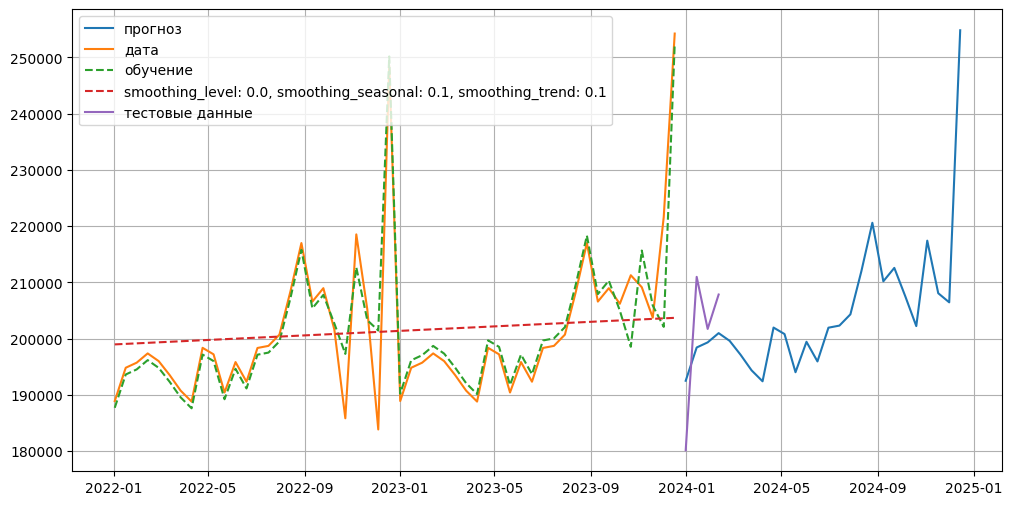

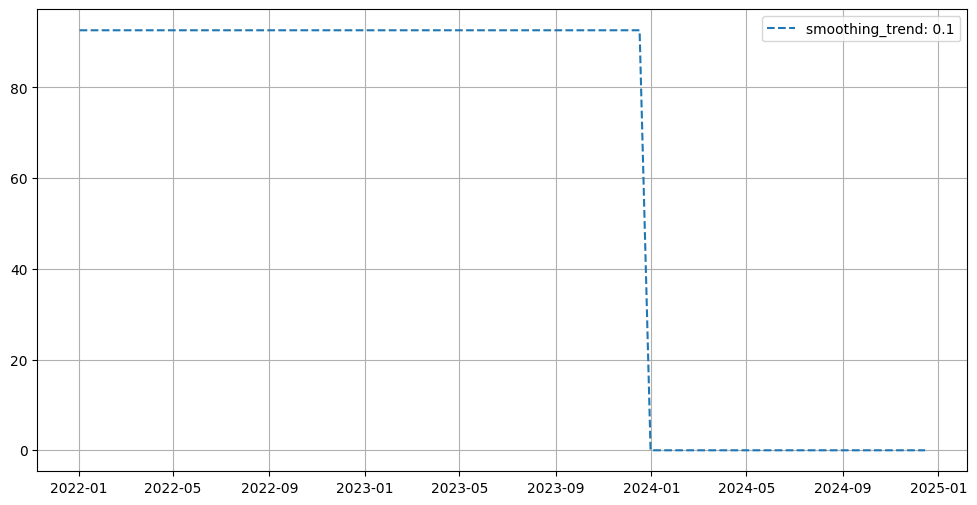

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


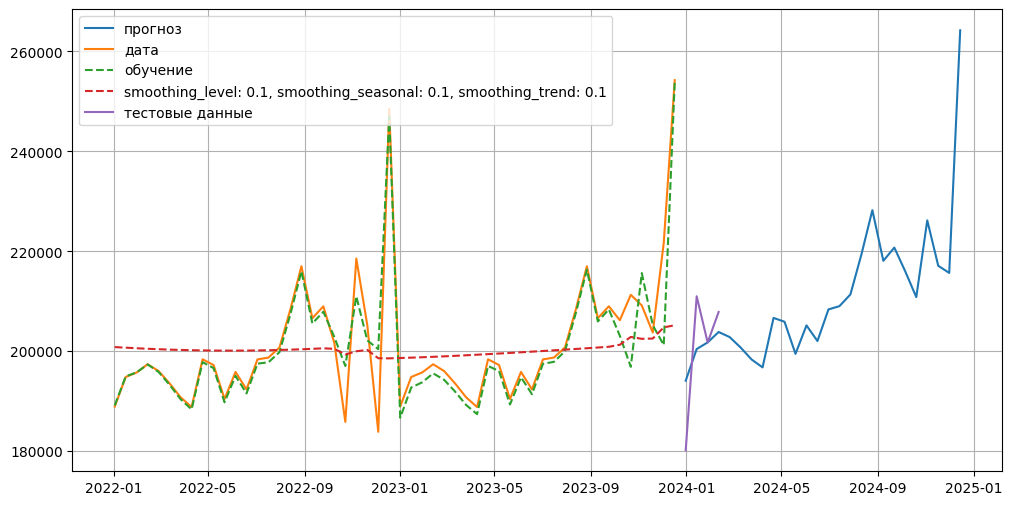

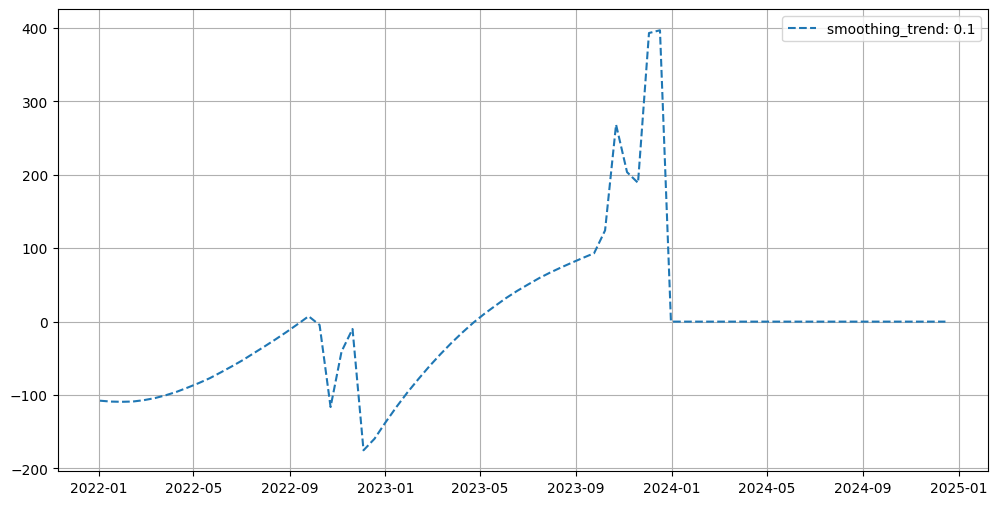

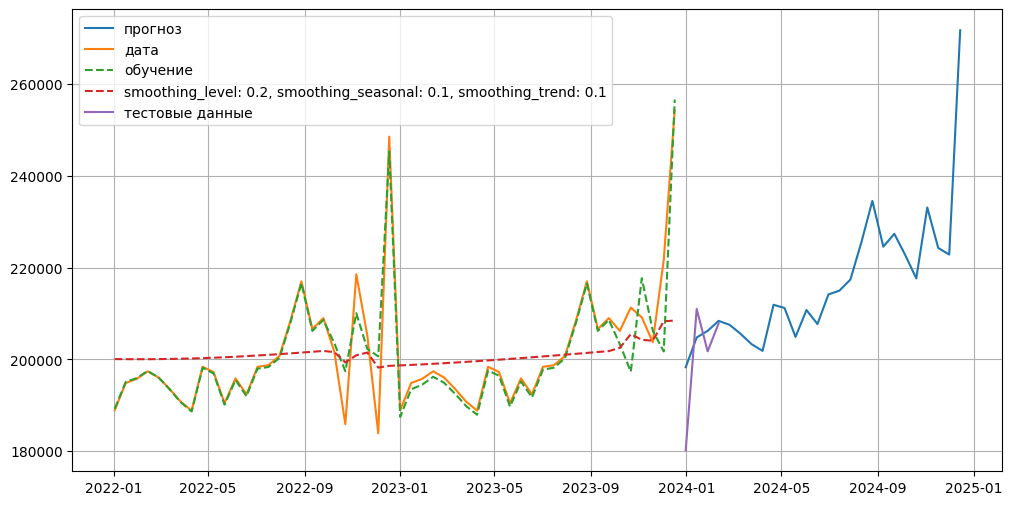

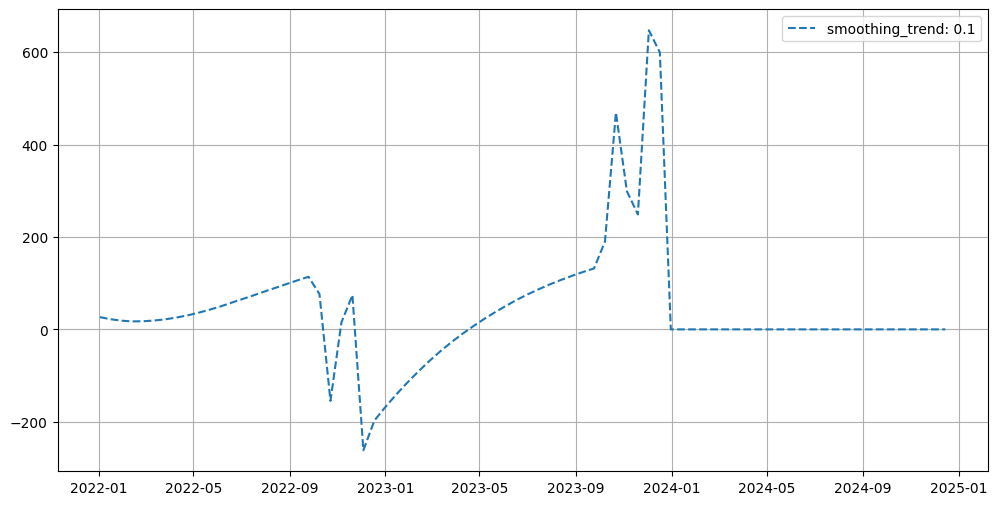

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


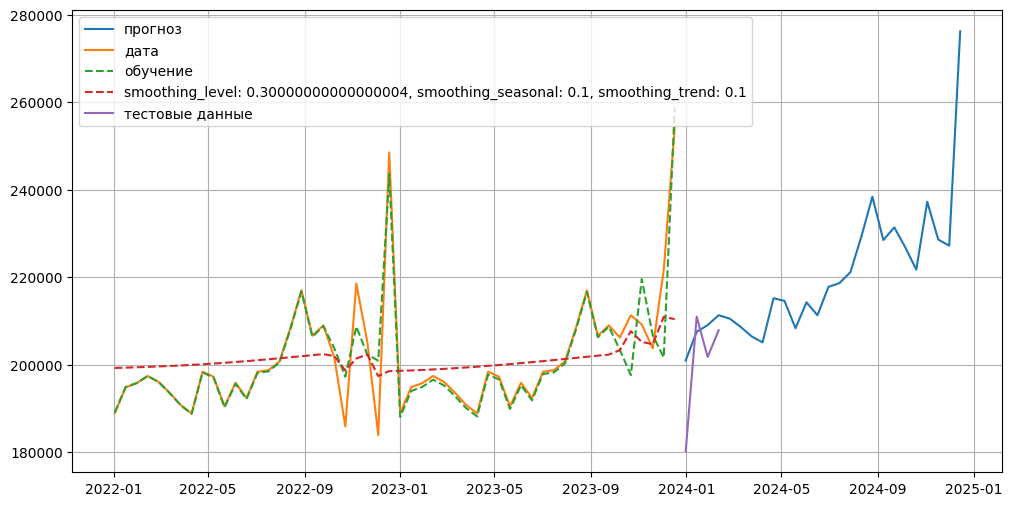

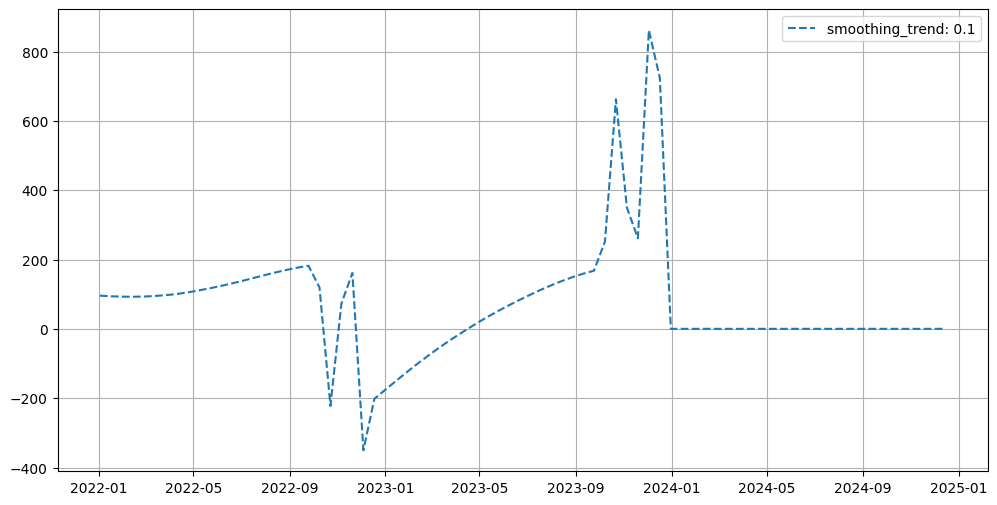

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


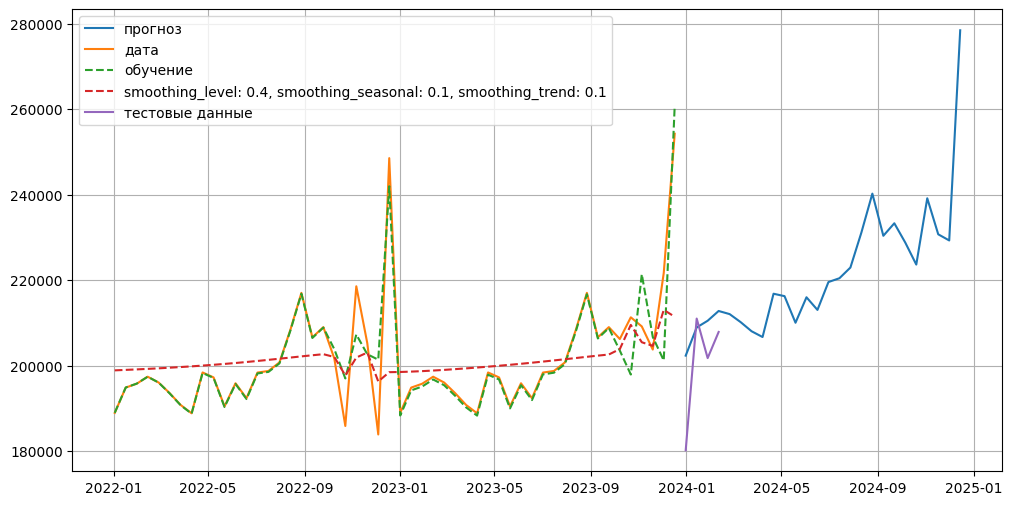

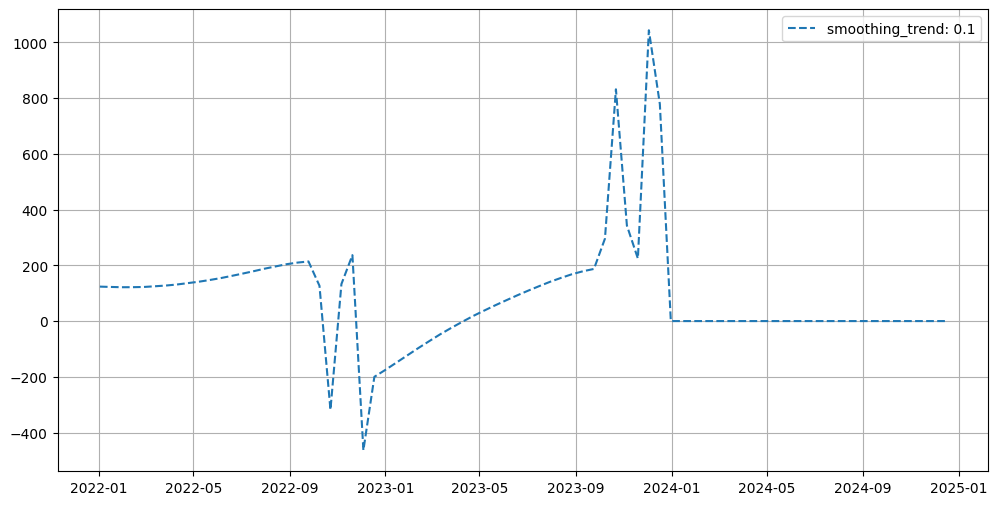

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


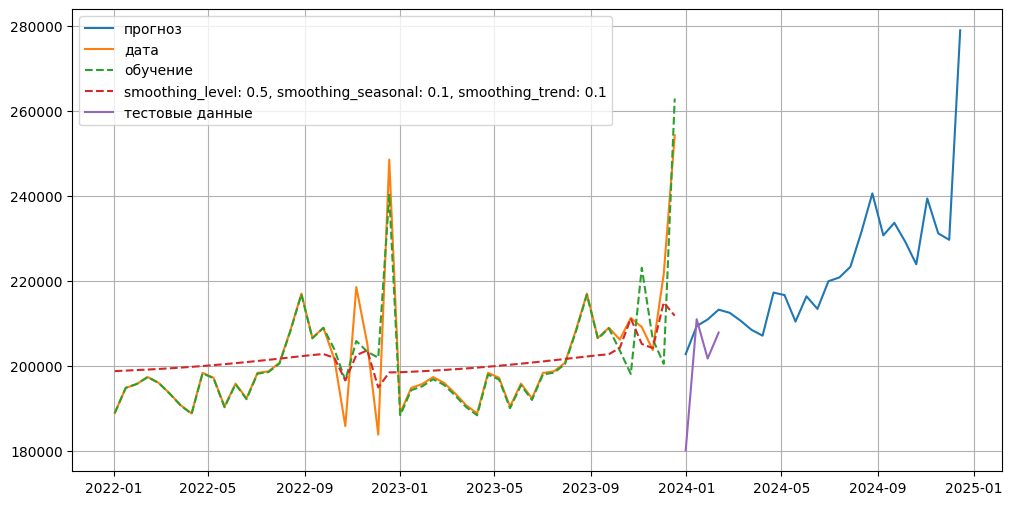

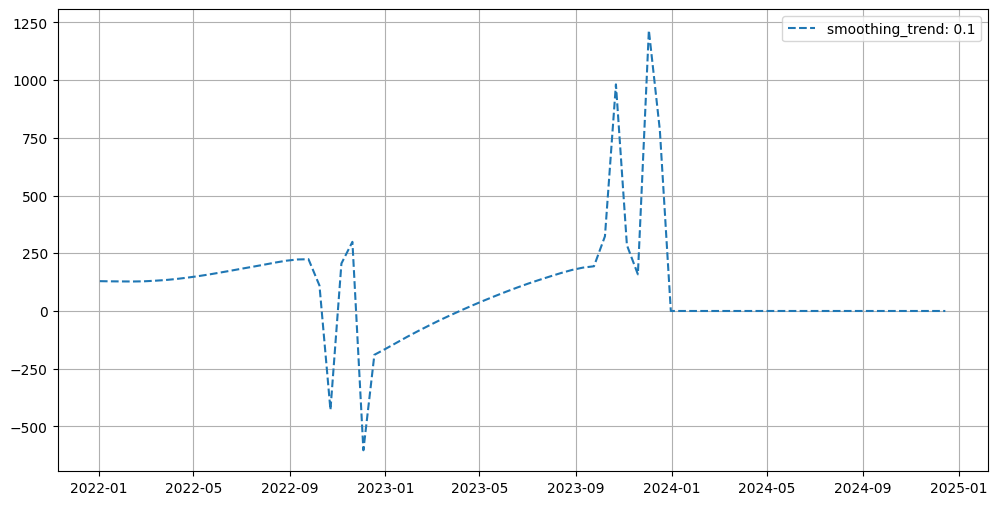

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


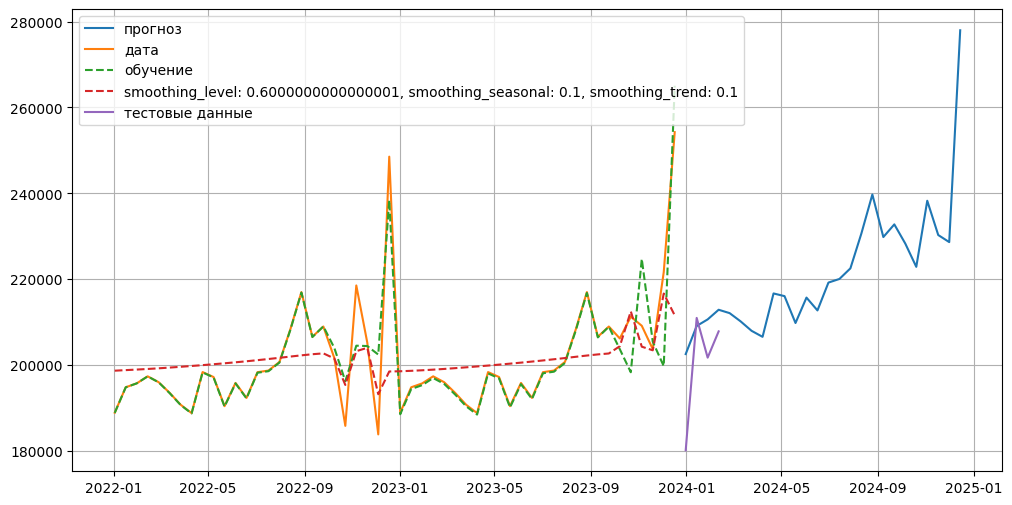

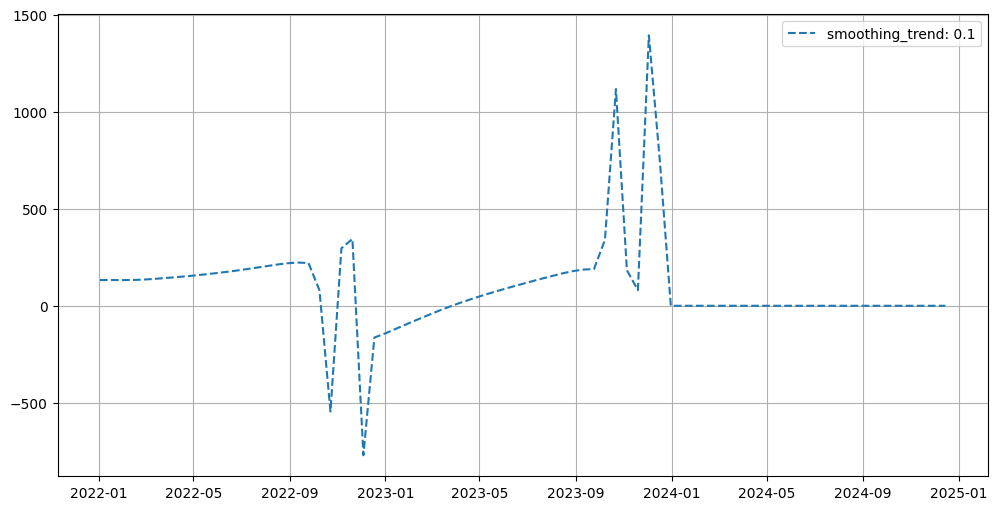

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


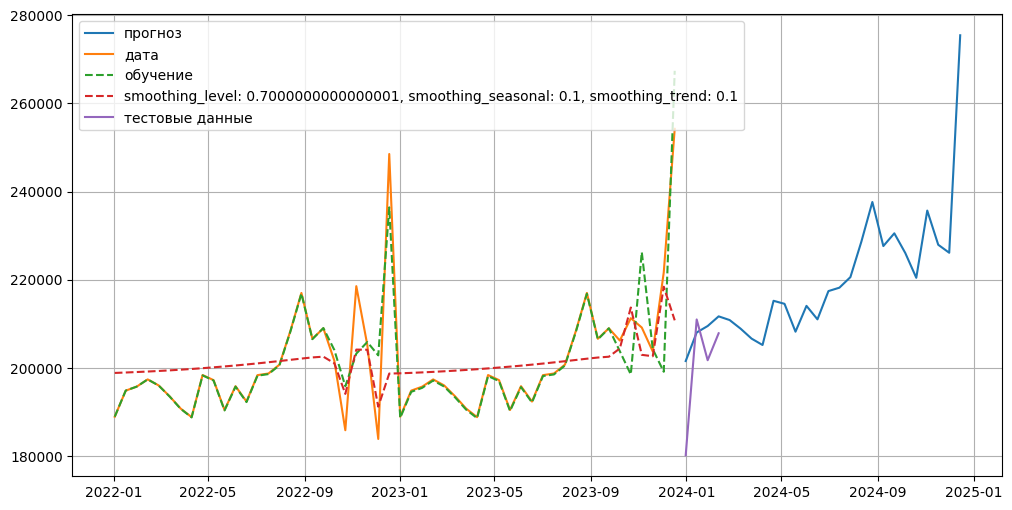

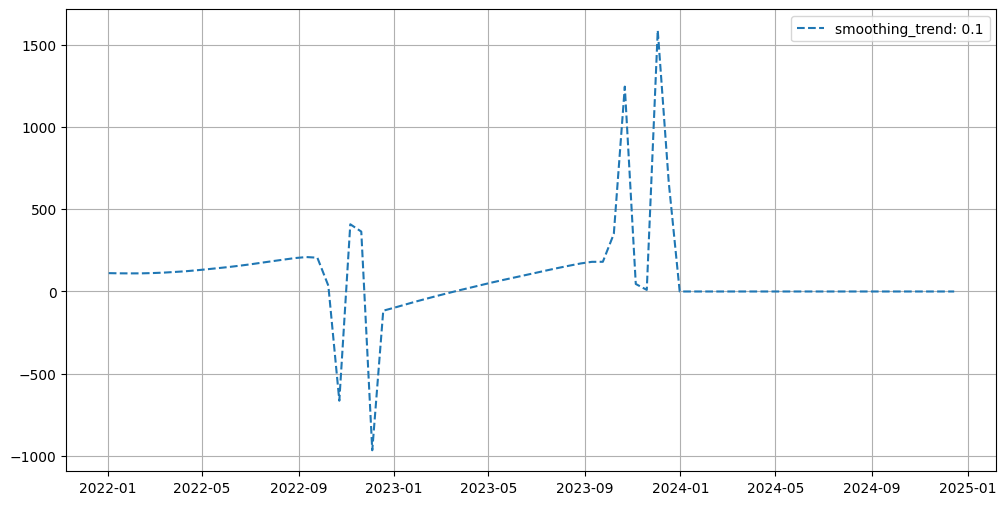

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


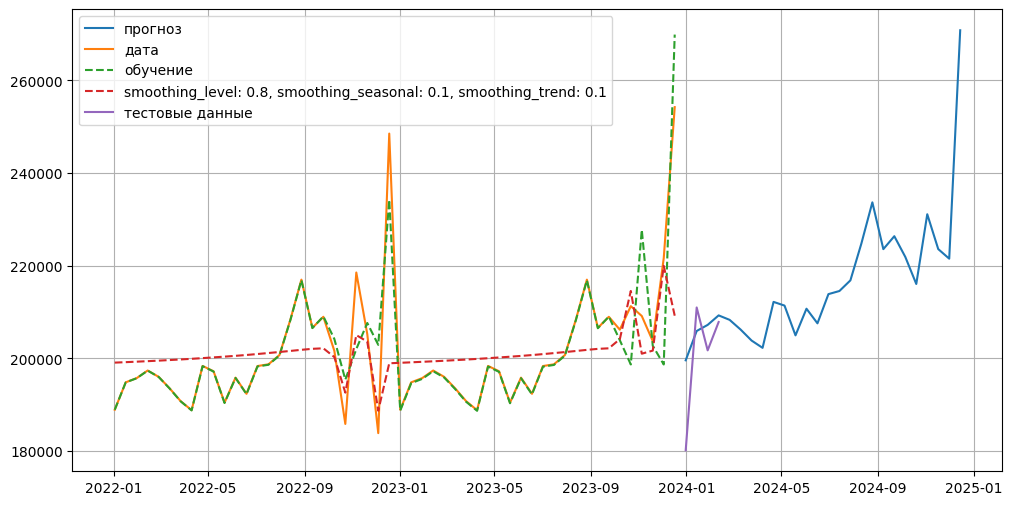

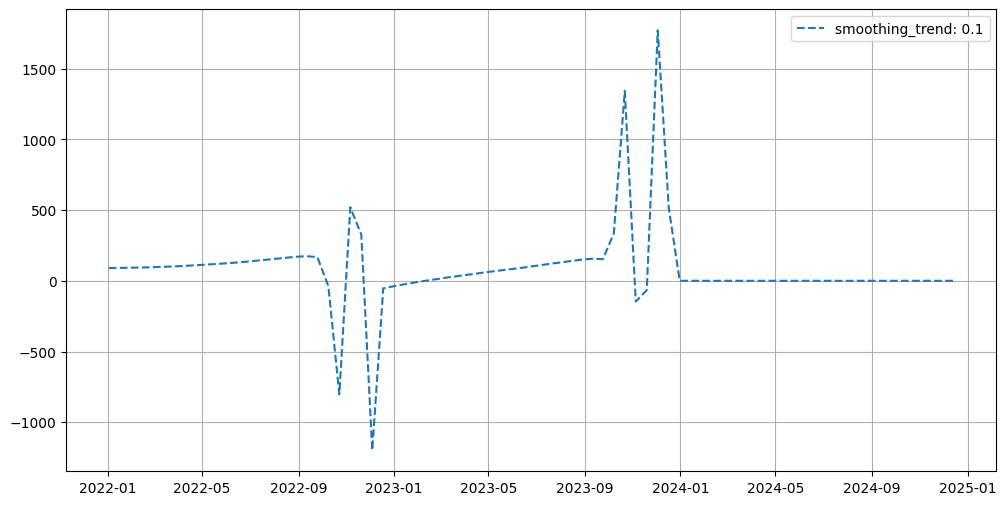

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


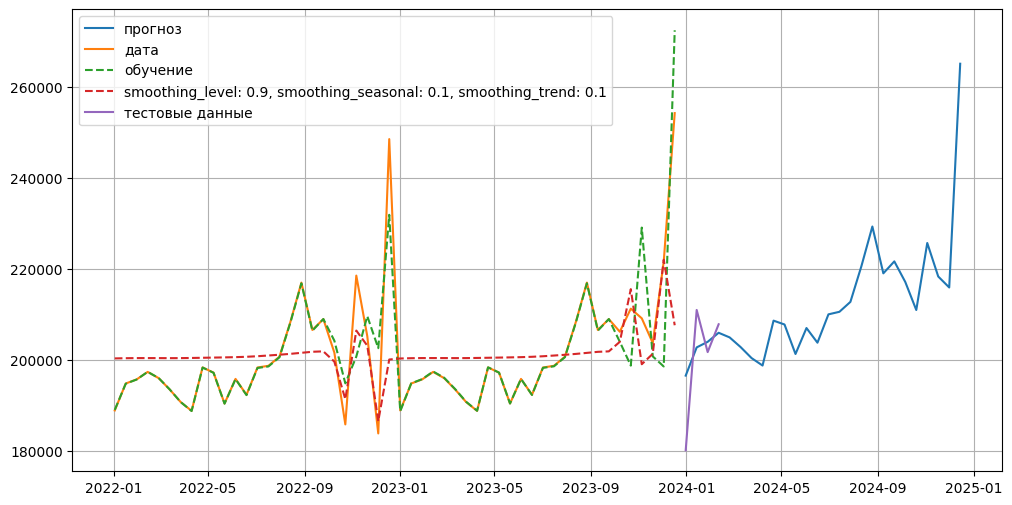

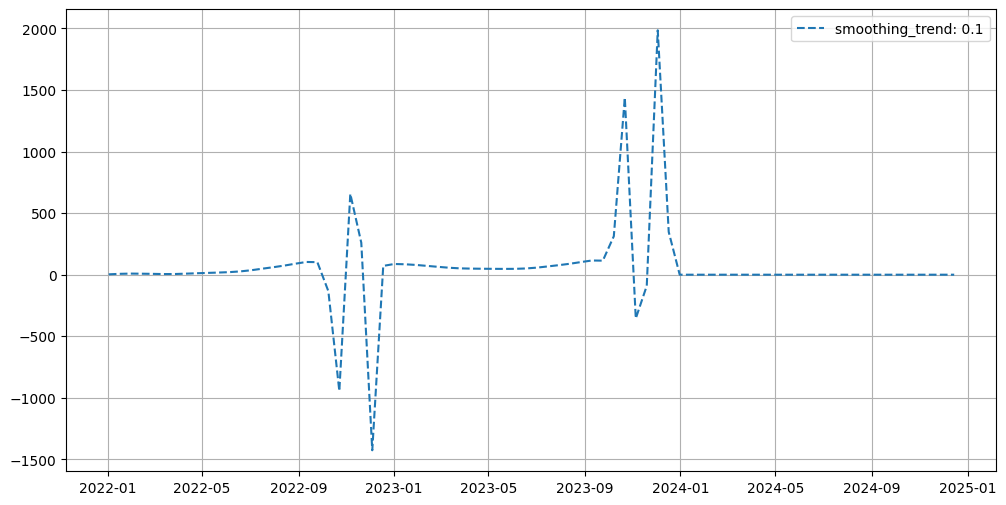

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


for i in np.arange(0, 1, 0.1):

    additive_model_concat = ExponentialSmoothing(
            concat_df_new,
            trend="add",
            seasonal='add',
            seasonal_periods=len(concat_df_new,)//2,  # 26

            # damped_trend=True,
            initialization_method='estimated',

            dates=concat_df_new.index).fit(smoothing_trend=0.1,
                                           smoothing_level=i,
                                           smoothing_seasonal=0.1)
                                          #  damping_trend=0)  # optimized=

    additive_forecast_concat = additive_model_concat.forecast(26)
    plt.figure(figsize=(12,6))
    plt.plot(additive_forecast_concat,label='прогноз')
    plt.plot(concat_df_new, label='дата')

    # plt.plot(additive_model_concat.resid, label='resid')
    plt.plot(additive_model_concat.fittedvalues, label='обучение', linestyle='--')
    # plt.plot(additive_model_concat.trend, label='trend', linestyle='--')
    plt.plot(additive_model_concat.level, label=f'smoothing_level: {additive_model_concat.params["smoothing_level"]}, \
smoothing_seasonal: {additive_model_concat.params["smoothing_seasonal"]}, \
smoothing_trend: {additive_model_concat.params["smoothing_trend"]}', linestyle='--')
    plt.plot(series_data_org[end_train:], label='тестовые данные')
    plt.legend()
    plt.grid(True)
    plt.show()

    vc = pd.Series([0 for i in range(26)],index=additive_forecast_concat.index)
    trend_val = pd.concat([additive_model_concat.trend,vc])


    plt.figure(figsize=(12,6))

    plt.plot(trend_val,label=f'smoothing_trend: {additive_model_concat.params["smoothing_trend"]}' , linestyle='--')
    # plt.plot(additive_model_concat.season, label='season', linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.show()

In [8]:
additive_model_concat.params

{'smoothing_level': 0.9,
 'smoothing_trend': 0.005,
 'smoothing_seasonal': 0.09499999999999997,
 'damping_trend': 0.99,
 'initial_level': 200109.8584615384,
 'initial_trend': 1.0913936421275137e-11,
 'initial_seasons': array([-10946.00766272,  -5028.56766272,  -4123.01766272,  -2477.99766272,
         -3846.39766272,  -6327.22766272,  -9091.02766272, -11128.62420118,
         -2151.66131657,  -3616.13843195, -10190.11275888,  -5478.88448964,
         -9805.79554734,  -1510.82766272,  -1139.46766272,    861.46233728,
          8531.35233728,  17141.40733728,   6736.06233728,   9118.81733728,
          1765.73233728, -14011.64766272,  18678.63233728,   5368.48233728,
        -15998.76766272,  48670.22233728]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


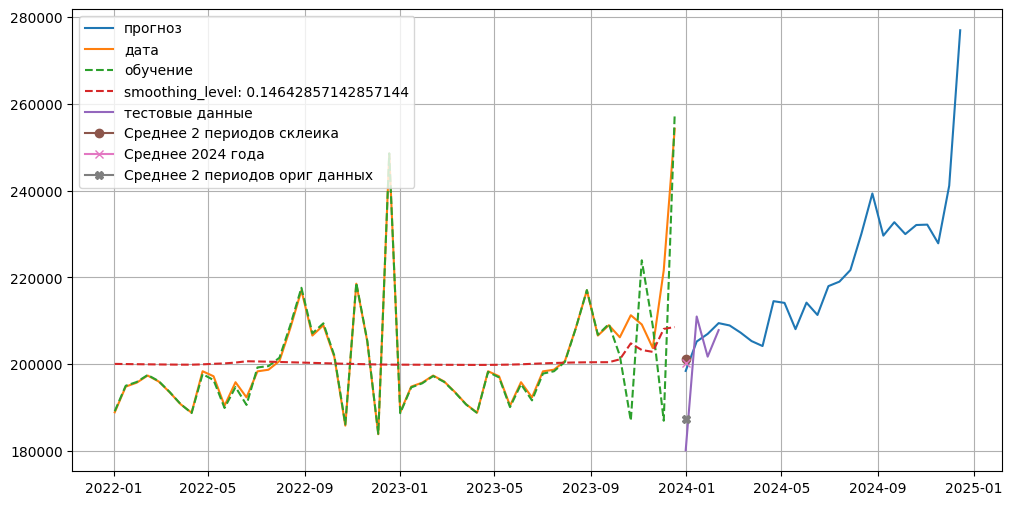

In [9]:
end_train_new = '2023-12-24 23:59:59'

concat_df_new_1 = pd.concat([series_data_org[:end_train_new][result[0] + (len(series_data_org[:end_train_new])//2) - result[0]:result[0]+series_data_org[:end_train_new][:result[0]].shape[0] +(len(series_data_org[:end_train_new])//2) - result[0]],
                       series_data_org[:end_train_new][result[0]:]],
                       ignore_index=True
                       )
concat_df_new_1.index = series_data_org[:end_train_new].index

additive_model_base = ExponentialSmoothing(
            concat_df_new_1,
            trend="add",
            seasonal='add',
            # seasonal_periods=len(concat_df_new_1)//2,  # 26
            seasonal_periods=26,  # 26

            damped_trend=True,
            initialization_method='estimated',

            dates=concat_df_new_1.index).fit()  # optimized=

additive_forecast_base = additive_model_base.forecast(26)
plt.figure(figsize=(12,6))
plt.plot(additive_forecast_base,label='прогноз')
plt.plot(concat_df_new_1, label='дата')

# plt.plot(additive_model_concat.resid, label='resid')
plt.plot(additive_model_base.fittedvalues, label='обучение', linestyle='--')
# plt.plot(additive_model_concat.trend, label='trend', linestyle='--')
plt.plot(additive_model_base.level, label=f'smoothing_level: {additive_model_base.params["smoothing_level"]}', linestyle='--')
plt.plot(series_data_org[end_train:], label='тестовые данные')
plt.plot(np.datetime64('2023-12-31'),201313,marker='o', label='Среднее 2 периодов склеика')
plt.plot(np.datetime64('2023-12-31'),200192,marker='x', label='Среднее 2024 года')
plt.plot(np.datetime64('2023-12-31'),187462,marker='X', label='Среднее 2 периодов ориг данных')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
concat_df_new_1.mean()

201313.7909615385

In [11]:
series_data_org[end_train:].mean()


200192.9600000001

In [12]:
series_data_org.mean()

187462.01107142863

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


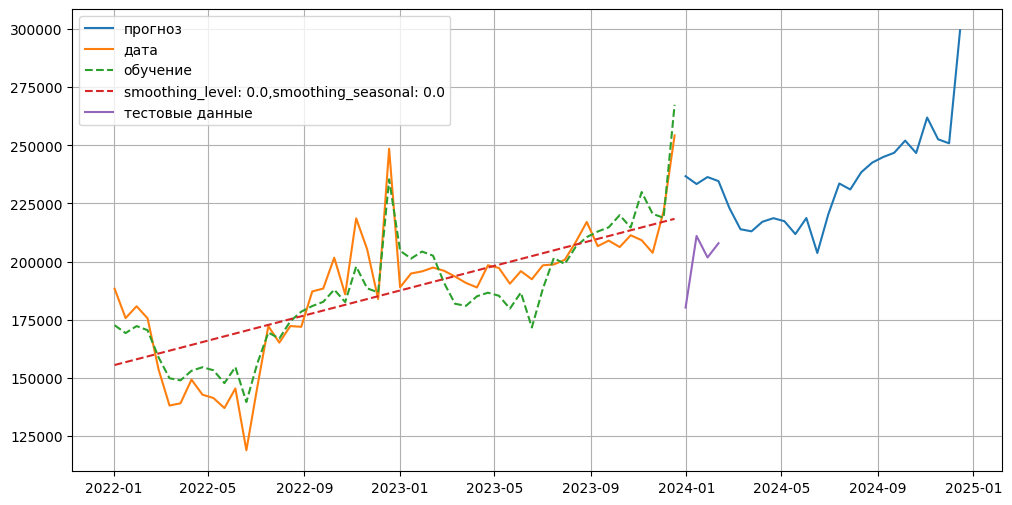

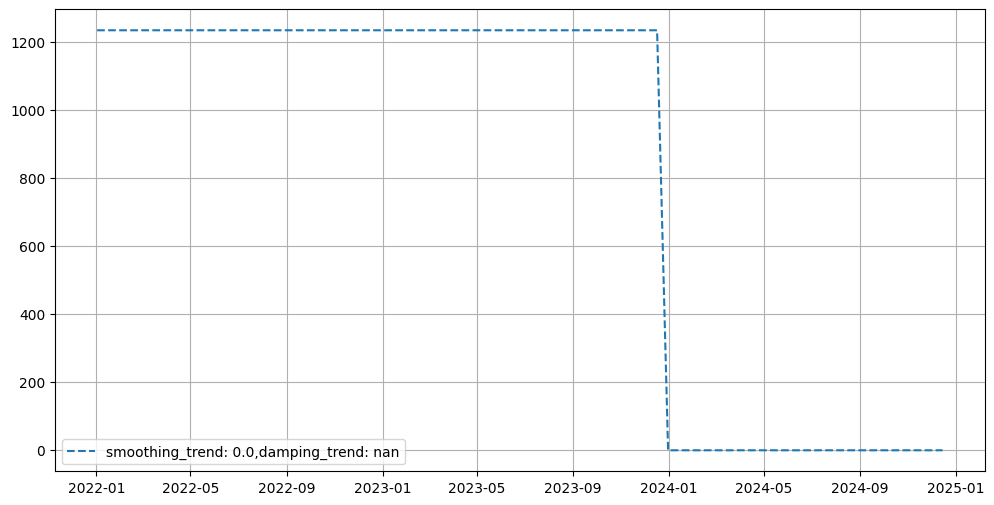

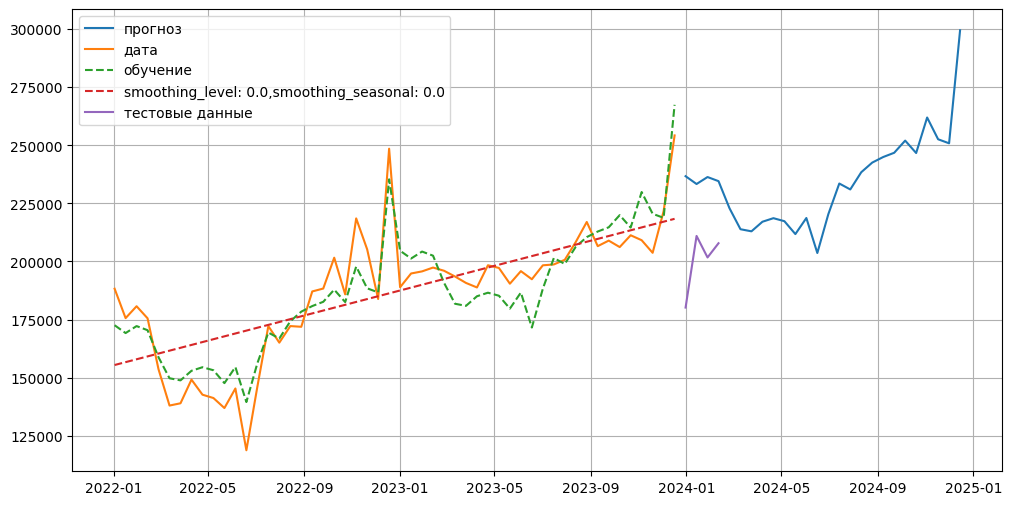

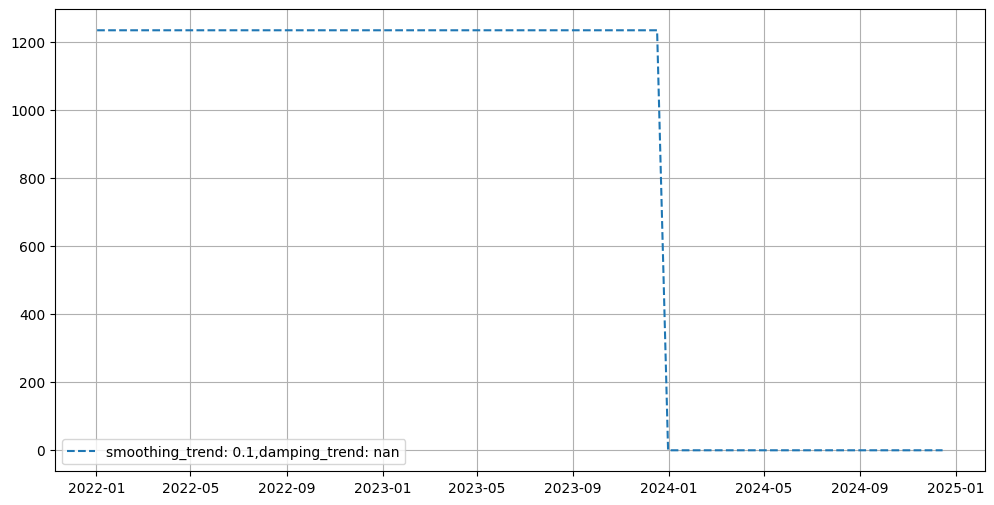

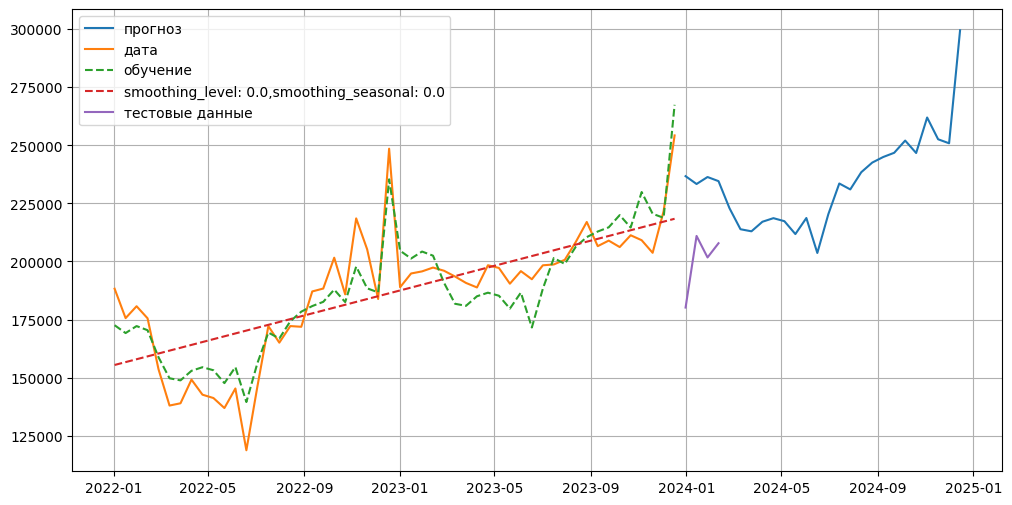

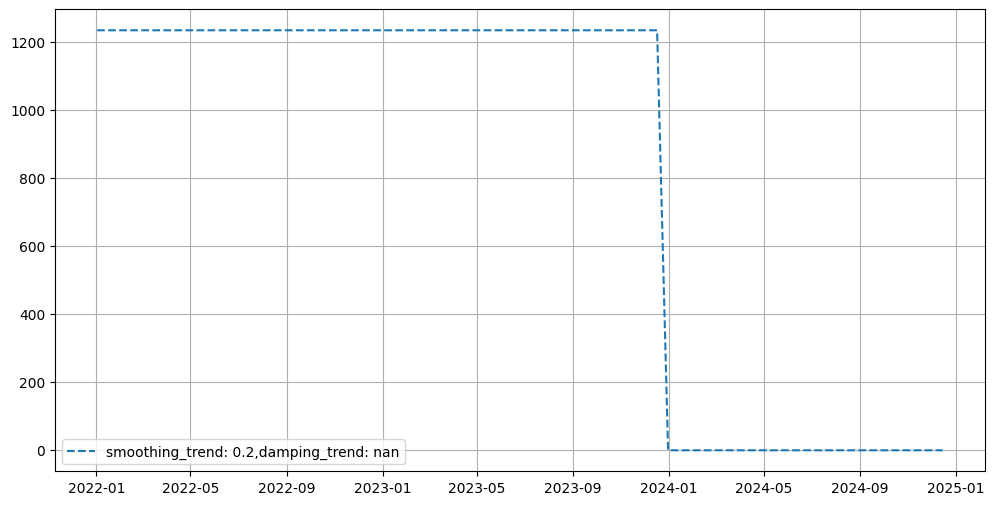

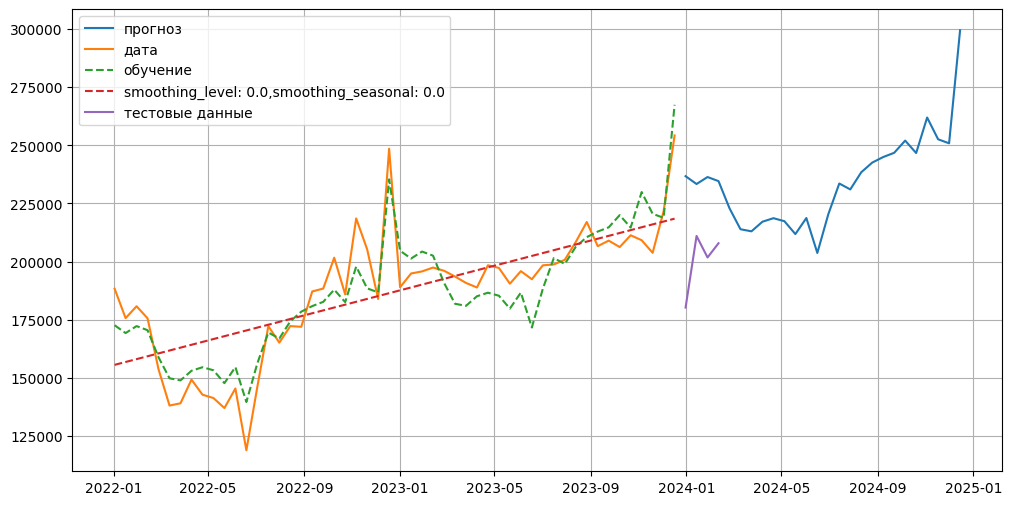

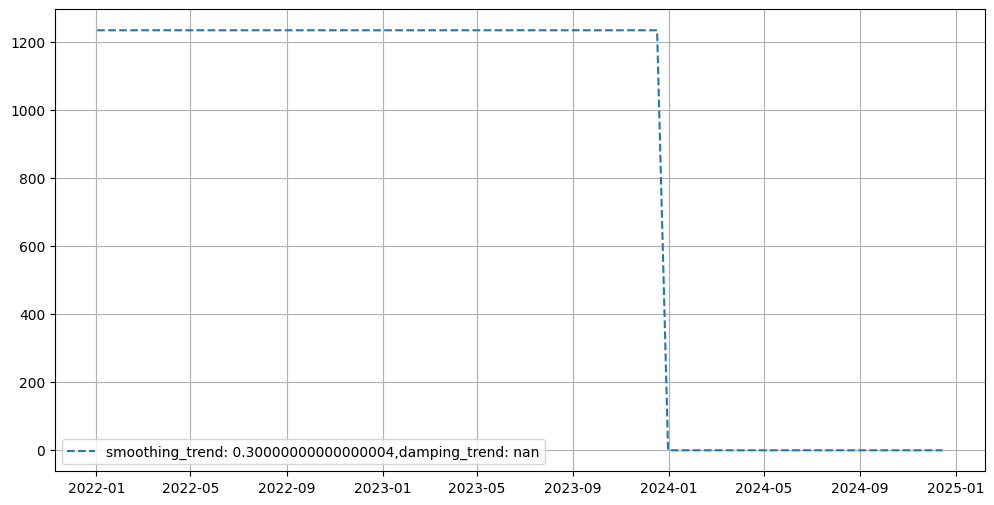

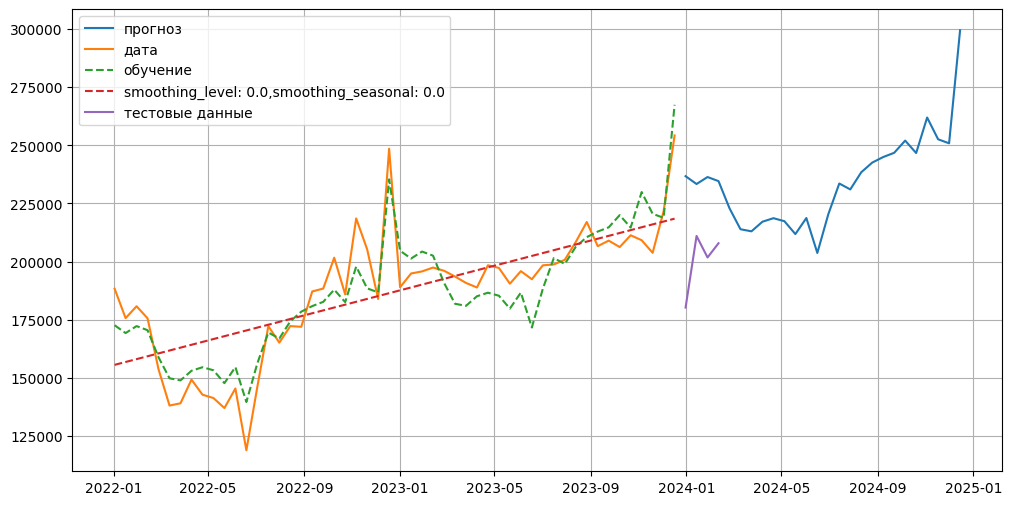

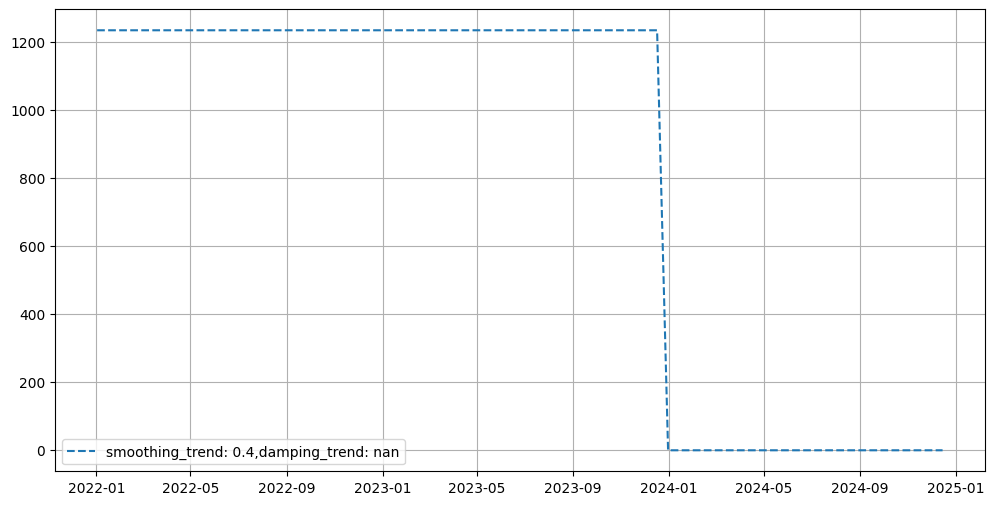

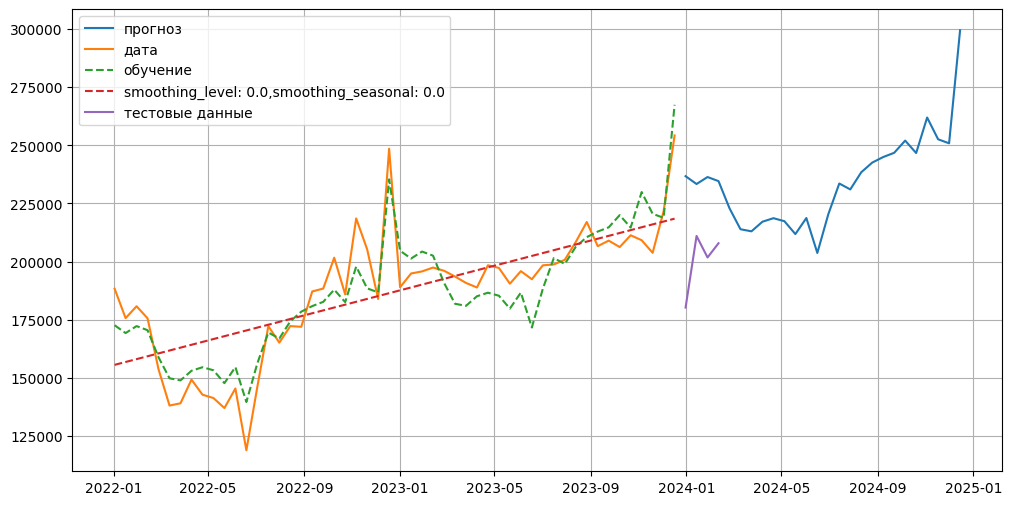

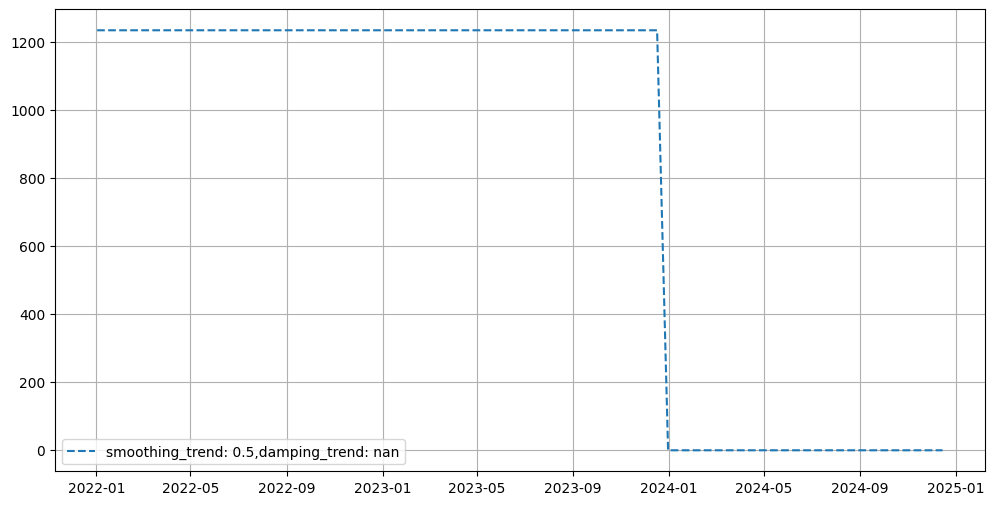

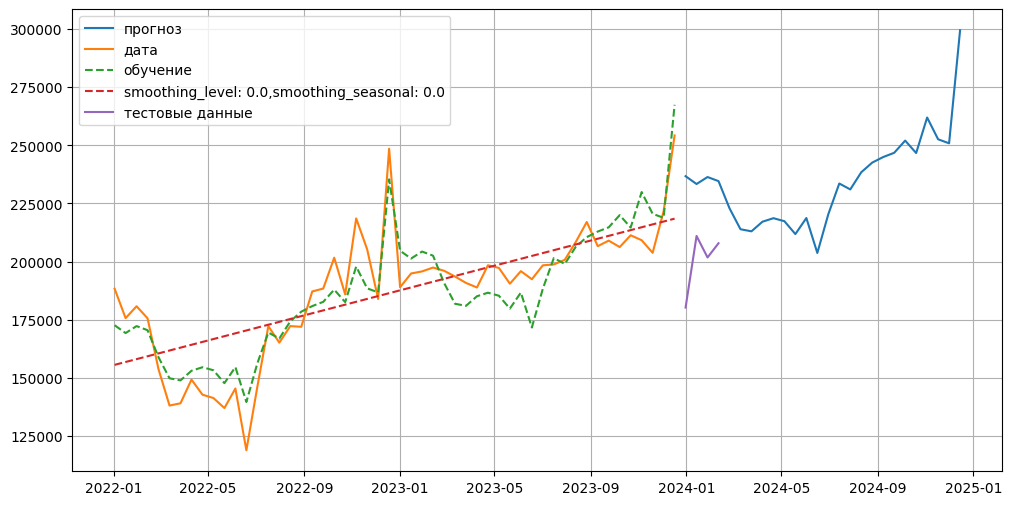

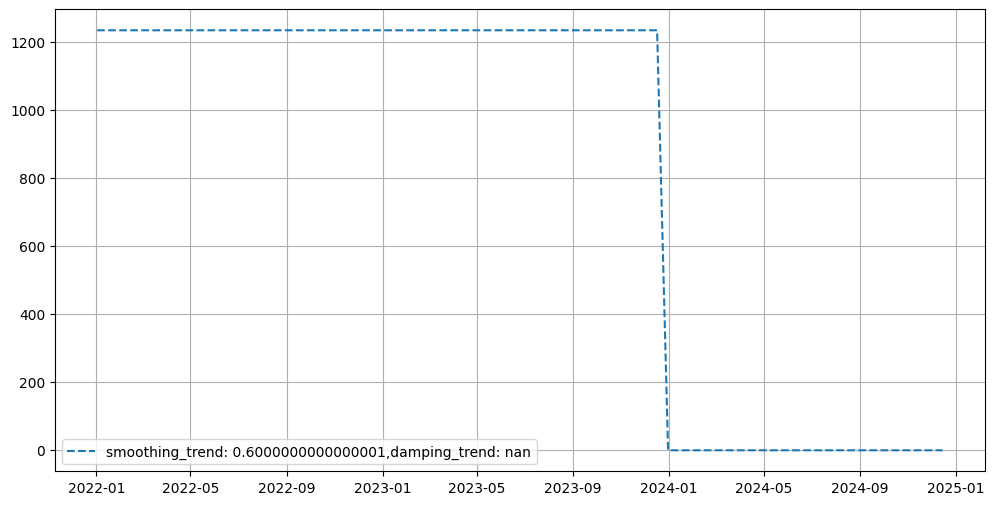

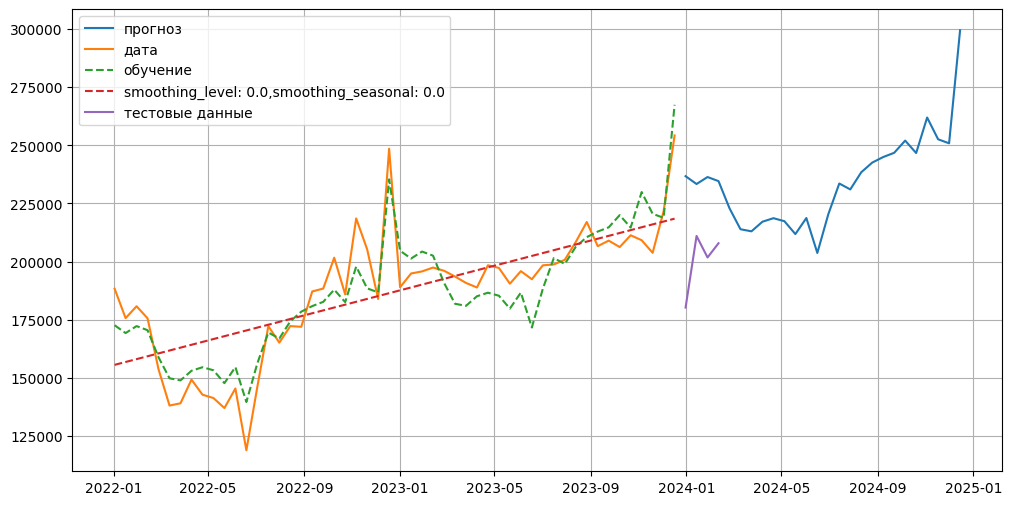

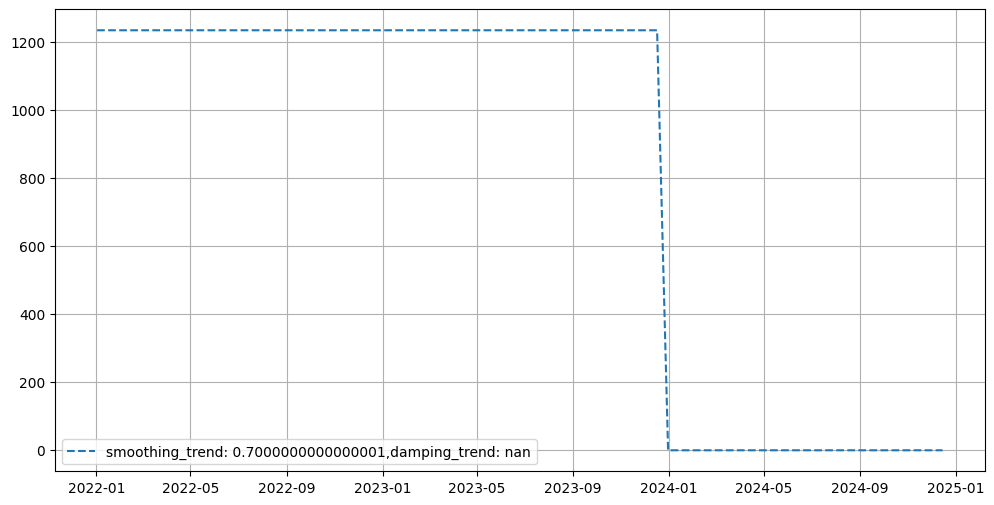

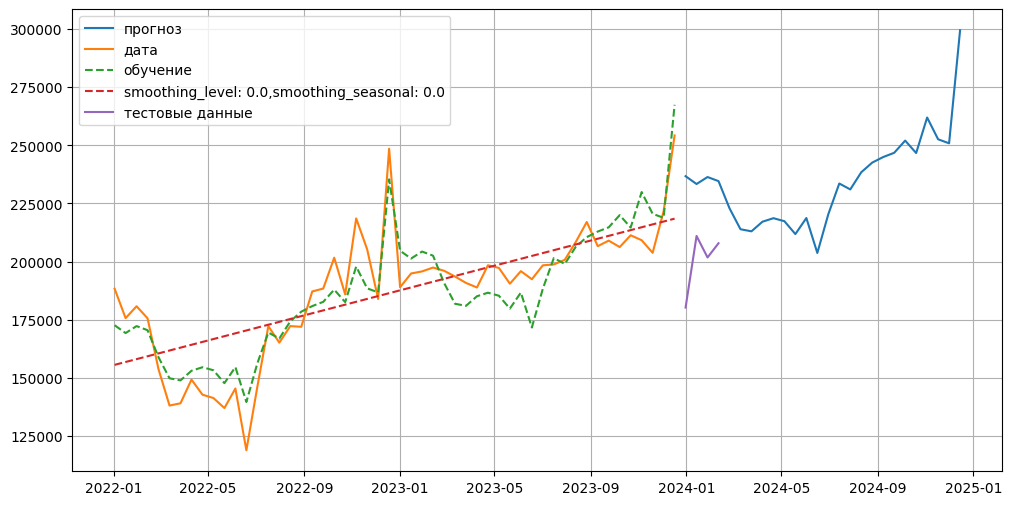

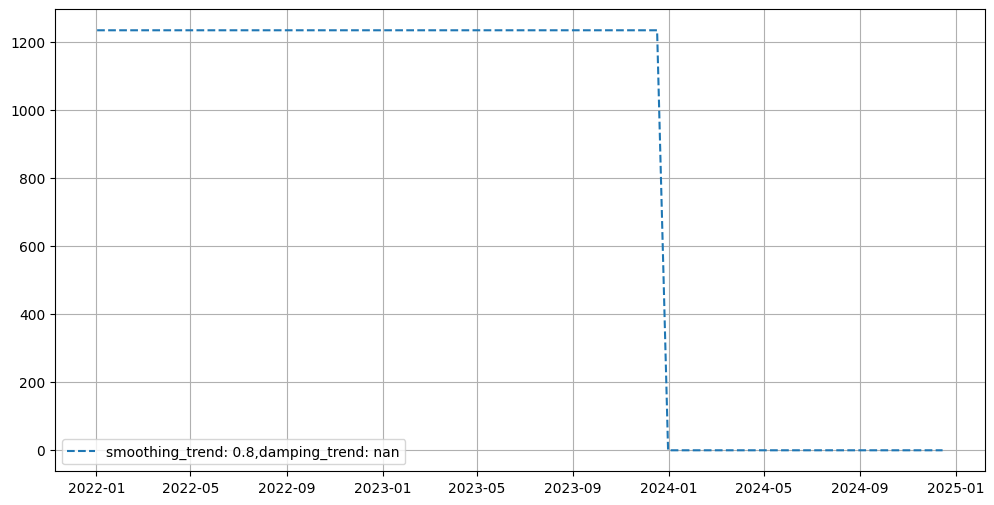

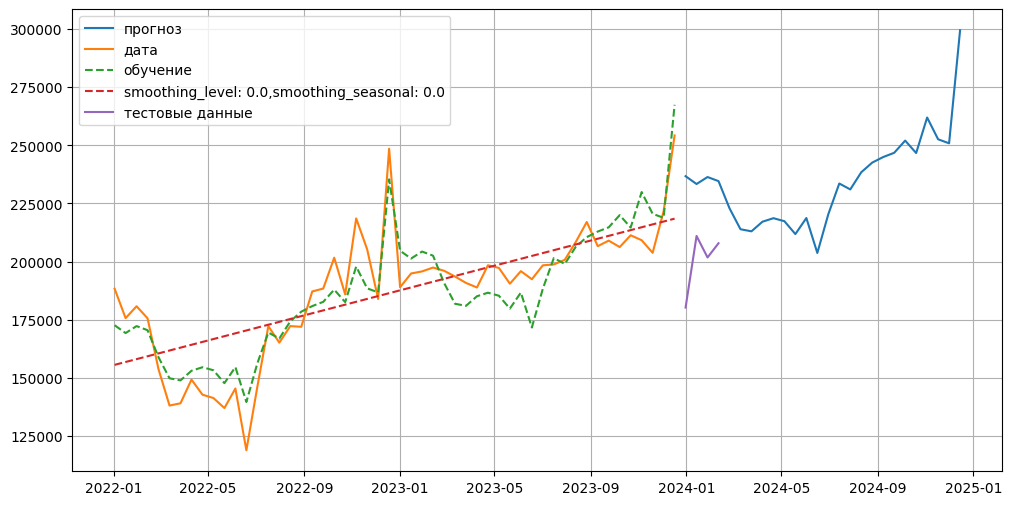

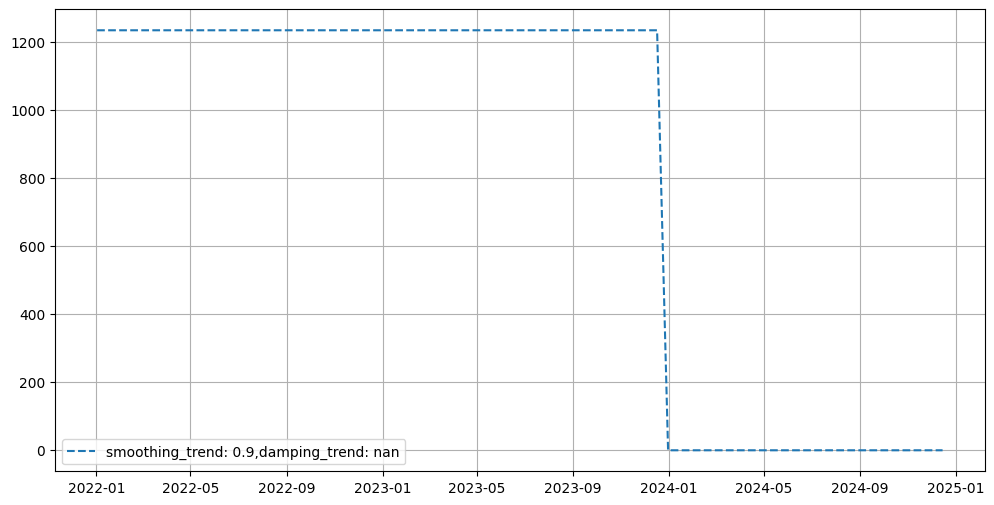

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


for i in np.arange(0, 1, 0.1):

    additive_model_concat_trend = ExponentialSmoothing(
            series_data_org[:end_train],
            trend="add",
            seasonal='add',
            seasonal_periods=26,  # 26

            # damped_trend=True,
            initialization_method='estimated',

            dates=series_data_org[:end_train].index).fit(smoothing_trend=i,
                                           smoothing_level=0,
                                           smoothing_seasonal=0)
                                          #  damping_trend=0)  # optimized=

    additive_forecast_concat_trend = additive_model_concat_trend.forecast(26)
    plt.figure(figsize=(12,6))
    plt.plot(additive_forecast_concat_trend,label='прогноз')
    plt.plot(series_data_org[:end_train], label='дата')

    # plt.plot(additive_model_concat_trend.resid, label='resid')
    plt.plot(additive_model_concat_trend.fittedvalues, label='обучение', linestyle='--')
    # plt.plot(additive_model_concat_trend.trend, label='trend', linestyle='--')
    plt.plot(additive_model_concat_trend.level, label=f'smoothing_level: {additive_model_concat_trend.params["smoothing_level"]},smoothing_seasonal: {additive_model_concat_trend.params["smoothing_seasonal"]}', linestyle='--')
    plt.plot(series_data_org[end_train:], label='тестовые данные')
    plt.legend()
    plt.grid(True)
    plt.show()

    vc_1 = pd.Series([0 for i in range(26)],index=additive_forecast_concat_trend.index)
    trend_val_1 = pd.concat([additive_model_concat_trend.trend,vc_1])



    plt.figure(figsize=(12,6))

    plt.plot(trend_val_1,label=f'smoothing_trend: {additive_model_concat_trend.params["smoothing_trend"]},damping_trend: {additive_model_concat_trend.params["damping_trend"]}' , linestyle='--')

    # plt.plot(additive_model_concat_trend.season, label='season', linestyle='--')
    plt.grid(True)
    plt.legend()
    plt.show()

In [37]:
additive_model_concat_trend.summary()

Dep. Variable:,SALES VOL,No. Observations:,52
Model:,ExponentialSmoothing,SSE,1968256531.805
Optimized:,True,AIC,969.357
Trend:,Additive,BIC,1029.845
Seasonal:,Additive,AICC,1094.024
Seasonal Periods:,26,Date:,"Tue, 21 May 2024"
Box-Cox:,False,Time:,11:38:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9000000,alpha,False
smoothing_trend,0.000000,beta,False


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


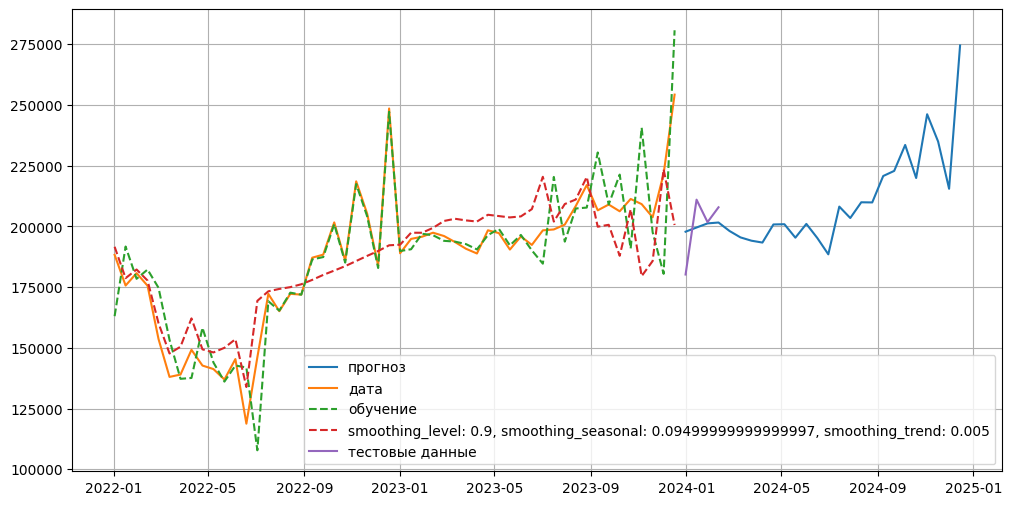

In [63]:
additive_model_concat_trend = ExponentialSmoothing(
            series_data_org[:end_train],
            trend="add",
            seasonal='add',
            seasonal_periods=26,  # 26

            damped_trend=True,
            initialization_method='estimated',

            dates=series_data_org[:end_train].index).fit(#smoothing_trend=0.1,
                                           smoothing_level=0.9,
                                           )
                                           #smoothing_seasonal=0.5)
                                          #  damping_trend=0)  # optimized=

additive_forecast_concat_trend = additive_model_concat_trend.forecast(26)
plt.figure(figsize=(12,6))
plt.plot(additive_forecast_concat_trend,label='прогноз')
plt.plot(series_data_org[:end_train], label='дата')

# plt.plot(additive_model_concat_trend.resid, label='resid')
plt.plot(additive_model_concat_trend.fittedvalues, label='обучение', linestyle='--')
# plt.plot(additive_model_concat_trend.trend, label='trend', linestyle='--')
plt.plot(additive_model_concat_trend.level, label=f'smoothing_level: {additive_model_concat_trend.params["smoothing_level"]}, \
smoothing_seasonal: {additive_model_concat_trend.params["smoothing_seasonal"]}, \
smoothing_trend: {additive_model_concat_trend.params["smoothing_trend"]}', linestyle='--')
plt.plot(series_data_org[end_train:], label='тестовые данные')
plt.legend()
plt.grid(True)
plt.show()